In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.
Fontconfig warning: ignoring C.UTF-8: not a valid language tag


In [5]:

df = pd.read_csv("./data_set_3.csv", sep=",", engine="python", on_bad_lines="skip")


In [8]:
df

,rowid,pl_name,hostname,pl_letter,k2_name,epic_hostname,epic_candname,hd_name,hip_name,tic_id,...,releasedate,pl_nnotes,k2_campaigns,k2_campaigns_num,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,...,2018-02-15,1,4,1.0,0,0,0,0,0,0
1,2,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,...,2016-07-28,1,4,1.0,0,0,0,0,0,0
2,3,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,...,2018-04-26,1,4,1.0,0,0,0,0,0,0
3,4,EPIC 201111557.01,EPIC 201111557,NaN,NaN,EPIC 201111557,EPIC 201111557.01,NaN,NaN,TIC 176942156,...,2018-08-02,0,10,1.0,0,0,0,0,0,0
4,5,EPIC 201111557.01,EPIC 201111557,NaN,NaN,EPIC 201111557,EPIC 201111557.01,NaN,NaN,TIC 176942156,...,2018-02-15,0,10,1.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,4000,WASP-85 A b,WASP-85 A,b,K2-94 b,EPIC 201862715,EPIC 201862715.01,NaN,NaN,TIC 380619414,...,2019-09-05,1,1,1.0,0,0,0,0,0,0
4000,4001,Wolf 503 b,Wolf 503,b,K2-262 b,EPIC 212779563,NaN,NaN,HIP 67285,TIC 187278212,...,2022-05-23,0,17,1.0,1,0,0,0,0,0
4001,4002,Wolf 503 b,Wolf 503,b,K2-262 b,EPIC 212779563,NaN,NaN,HIP 67285,TIC 187278212,...,2018-09-06,0,17,1.0,1,0,0,0,0,0
4002,4003,Wolf 503 b,Wolf 503,b,K2-262 b,EPIC 212779563,NaN,NaN,HIP 67285,TIC 187278212,...,2023-04-17,0,17,1.0,1,0,0,0,0,0


/Users/denakazerani/Documents/Nasa_Space_Challenge_M2Astra/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129680 (\N{RINGED PLANET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


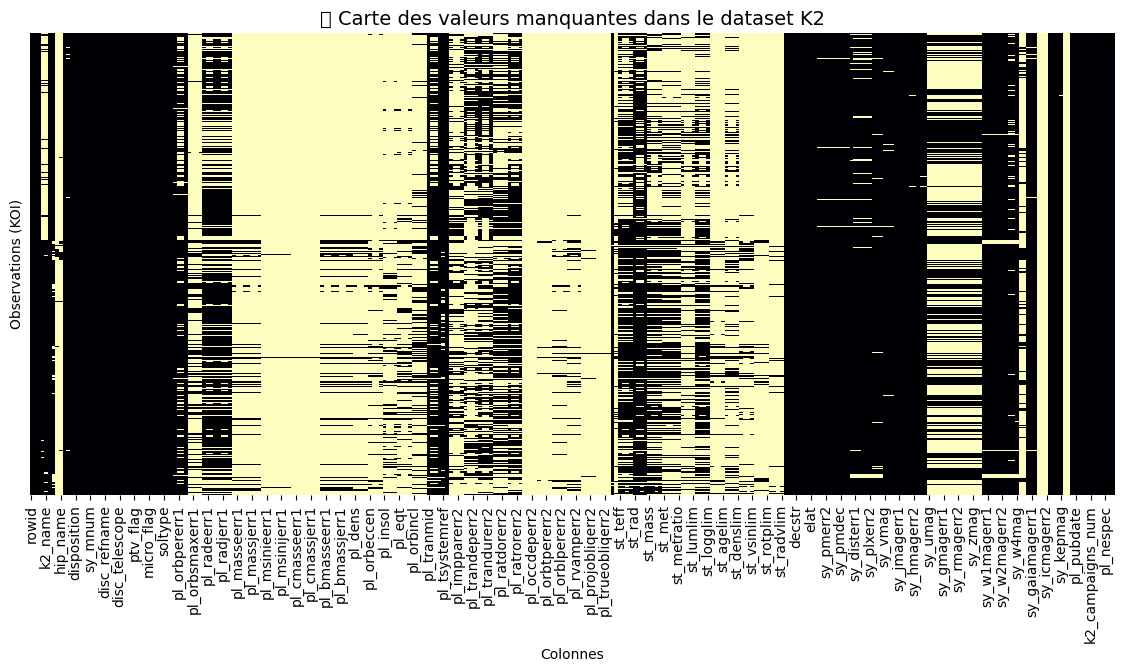

In [18]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.isna(), 
            cmap="magma",          # Palette de couleurs
            cbar=False,            # Pas de barre de couleur inutile
            yticklabels=False)     # Masquer les indices de ligne
plt.title("🪐 Carte des valeurs manquantes dans le dataset K2", fontsize=14)
plt.xlabel("Colonnes")
plt.ylabel("Observations (KOI)")
plt.show()


In [16]:
#Delete rows with discovery methos other than Transit
df_transit = df[df["discoverymethod"]== "Transit"]

In [26]:
k2_filtered_columns = [
    # Names
    "pl_name","hostname","pl_letter","k2_name","epic_hostname","hd_name","hip_name",
    "tic_id","gaia_id","default_flag","disposition","disp_refname",
    # System Composition
    "sy_snum","sy_pnum","sy_mnum","cb_flag",
    # Planet Discovery
    "discoverymethod","disc_year","disc_refname","disc_pubdate","disc_locale",
    "disc_facility","disc_telescope","disc_instrument",
    # Detections
    "rv_flag","pul_flag","ptv_flag","tran_flag","ast_flag","obm_flag","micro_flag",
    "etv_flag","ima_flag","dkin_flag","soltype","pl_controv_flag",
    # Planet Parameters
    "pl_refname","pl_orbper","pl_orbsmax","pl_rade","pl_radj","pl_masse","pl_massj",
    "pl_msinie","pl_msinij","pl_cmasse","pl_cmassj","pl_bmasse","pl_bmassj",
    "pl_bmassprov","pl_dens","pl_orbeccen","pl_insol","pl_eqt","pl_orbincl",
    "pl_tranmid","pl_tsystemref","ttv_flag","pl_imppar","pl_trandep","pl_trandur",
    "pl_ratdor","pl_ratror","pl_occdep","pl_orbtper","pl_orblper","pl_rvamp",
    "pl_projobliq","pl_trueobliq",
    # Stellar Data
    "st_refname","st_spectype","st_teff","st_rad","st_mass","st_met","st_metratio",
    "st_lum","st_logg","st_age","st_dens","st_vsin","st_rotp","st_radv",
    # System Data
    "sy_refname","sy_pm","sy_pmra","sy_pmdec","sy_dist","sy_plx","pl_nnotes",
    "k2_campaigns","k2_campaigns_num",
    # Position (subset)
    "rastr","decstr","ra","dec","glat","glon","elat","elon",
    # Photometry (subset)
    "sy_bmag","sy_vmag","sy_jmag","sy_hmag","sy_umag","sy_gmag","sy_rmag",
    "sy_imag","sy_zmag","sy_w1mag","sy_w2mag","sy_w3mag","sy_w4mag","sy_gaiamag",
    "sy_icmag","sy_tmag","sy_kepmag",
    # Dates (subset)
    "rowupdate","pl_pubdate","releasedate",
    # Additional Data
    "st_nphot","st_nrvc","st_nspec","pl_nespec","pl_ntranspec",
]
df_transit_filtered =df_transit[k2_filtered_columns]

In [56]:
df_transit_filtered.shape

(3979, 125)

/Users/denakazerani/Documents/Nasa_Space_Challenge_M2Astra/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129680 (\N{RINGED PLANET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


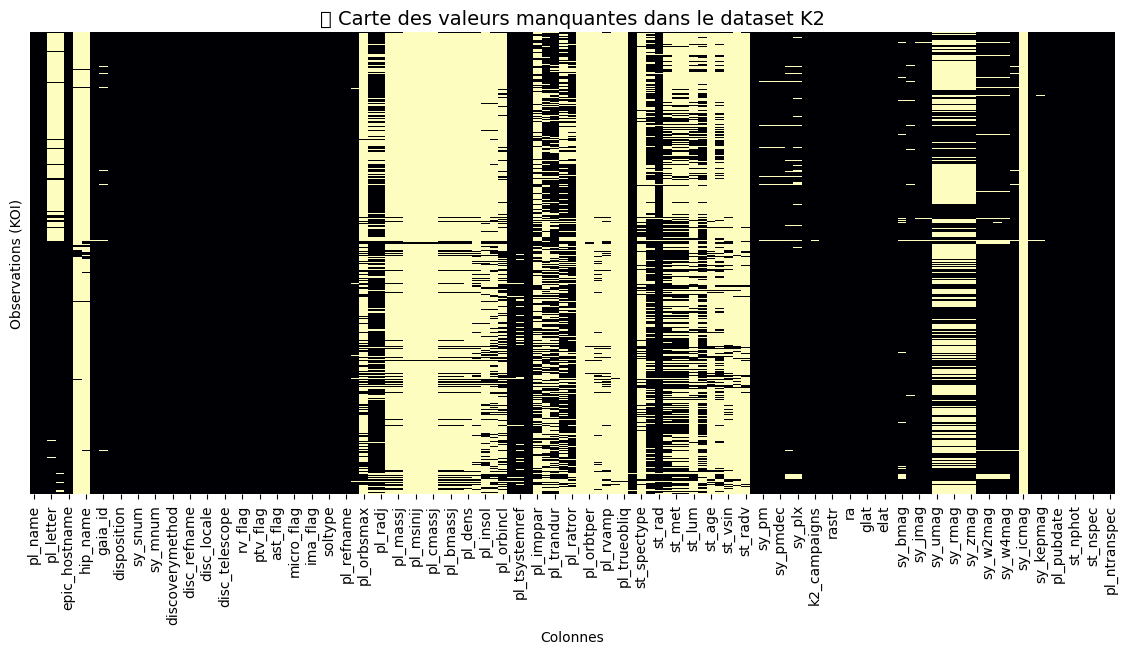

In [28]:
plt.figure(figsize=(14, 6))
sns.heatmap(df_transit_filtered.isna(), 
            cmap="magma",          # Palette de couleurs
            cbar=False,            # Pas de barre de couleur inutile
            yticklabels=False)     # Masquer les indices de ligne
plt.title("🪐 Carte des valeurs manquantes dans le dataset K2", fontsize=14)
plt.xlabel("Colonnes")
plt.ylabel("Observations (KOI)")
plt.show()

In [31]:
colonnes_manquantes = df_transit_filtered.columns[df_transit_filtered.isna().mean() > 0.50]
print(colonnes_manquantes)

Index(['hd_name', 'hip_name', 'pl_orbsmax', 'pl_masse', 'pl_massj',
       'pl_msinie', 'pl_msinij', 'pl_cmasse', 'pl_cmassj', 'pl_bmasse',
       'pl_bmassj', 'pl_bmassprov', 'pl_dens', 'pl_orbeccen', 'pl_insol',
       'pl_eqt', 'pl_orbincl', 'pl_imppar', 'pl_occdep', 'pl_orbtper',
       'pl_orblper', 'pl_rvamp', 'pl_projobliq', 'pl_trueobliq', 'st_spectype',
       'st_met', 'st_metratio', 'st_lum', 'st_age', 'st_dens', 'st_vsin',
       'st_rotp', 'st_radv', 'sy_umag', 'sy_gmag', 'sy_rmag', 'sy_imag',
       'sy_zmag', 'sy_icmag'],
      dtype='object')


In [33]:
k2_transit_columns = [
    "pl_orbper",     # période orbitale (jours)
    "pl_orbsmax",    # demi-grand axe (AU) — géométrie orbitale
    "pl_rade",       # rayon planétaire (rayons terrestres)
    "pl_radj",        # rayon planétaire (rayons de Jupiter)
    "pl_masse",      # masse planétaire (si estimée)
    "pl_massj",       # masse planétaire (en masses de Jupiter)
    "pl_msinie",     # masse × sin(i) (planétaire)
    "pl_msinij",      # version en Jupiter
    "pl_dens",       # densité planétaire
    "pl_orbeccen",    # excentricité orbitale
    "pl_orbincl",     # inclinaison orbitale
    "pl_tranmid",    # moment central du transit (temps de conjonction)  
    "pl_imppar",     # paramètre d’impact
    "pl_trandep",    # profondeur du transit
    "pl_trandur",    # durée du transit
    "pl_ratror",     # ratio : rayon planète / rayon étoile
    "pl_ratdor",     # ratio : a / R_star (semi-grand axe / rayon étoile)
    "pl_occdep",     # profondeur d’occultation (si mesurée)
    "pl_orbtper",     # argument du périastre (temps)
    "pl_orblper",     # argument du périastre (angle)
    "pl_rvamp",       # amplitude de variation radiale (m/s)
    "ttv_flag"        # flag indiquant variation de temps de transit
]
bad_quality_transit_columns = [c for c in k2_transit_columns if c in colonnes_manquantes]

In [34]:
print(bad_quality_transit_columns)

['pl_orbsmax', 'pl_masse', 'pl_massj', 'pl_msinie', 'pl_msinij', 'pl_dens', 'pl_orbeccen', 'pl_orbincl', 'pl_imppar', 'pl_occdep', 'pl_orbtper', 'pl_orblper', 'pl_rvamp']


In [36]:

df_K2_share_columns_TESS = pd.read_csv("./k2pandc_filtered.csv", sep=",", engine="python", on_bad_lines="skip")

In [55]:
df_K2_share_columns_TESS.shape

(3980, 31)

In [54]:
share_columns_TESS =df_K2_share_columns_TESS.columns.shape

In [ ]:
bad_quality_transit_columns_shared_with_TESS = [c for c in share_columns_TESS if c in bad_quality_transit_columns]

In [40]:
print(bad_quality_transit_columns_shared_with_TESS)

[]


In [41]:
df_transit_filtered_shared_columns_with_TESS=df_transit_filtered[[c for c in df_transit_filtered if c in share_columns_TESS]]

In [43]:
df_transit_filtered_shared_columns_with_TESS.head()

,pl_orbper,pl_rade,pl_tranmid,pl_trandep,st_teff,st_rad,st_logg,ra,dec
0,41.688644,2.355454,2.457069e+06,NaN,5703.00,0.956122,4.38000,53.651123,20.599021
1,41.685500,2.230000,2.457152e+06,NaN,5766.00,0.928000,4.50000,53.651123,20.599021
2,41.685500,2.578070,NaN,0.049,5766.00,1.080000,4.50000,53.651123,20.599021
3,2.301830,1.120000,2.457583e+06,2.268,4616.52,0.762602,4.53679,183.846245,-6.268329
4,2.302368,1.312588,2.457583e+06,NaN,4720.00,0.710995,4.50000,183.846245,-6.268329


In [59]:
print(df_transit_filtered_shared_columns_with_TESS["pl_trandep"].isna().sum())

1880


In [45]:
print(df_transit_filtered_shared_columns_with_TESS.columns[df_transit_filtered_shared_columns_with_TESS.isna().mean() > 0.50])

Index([], dtype='object')


In [52]:
df_transit_filtered_shared_columns_with_TESS.to_csv("K2_filtered_Transit_Share_With_TESS_and_Documentation.csv", index=False)

In [53]:
df_transit_filtered_shared_columns_with_TESS.shape

(3979, 9)

## Traitement des données

In [49]:
from narwhals import col
import pandas as pd

def analyse_nan(df: pd.DataFrame, seuil: float = 20.0) -> pd.DataFrame:
    """
    Analyse les valeurs manquantes d'un DataFrame et affiche celles dépassant un certain seuil.
    
    Paramètres
    ----------
    df : pd.DataFrame
        Le DataFrame à analyser.
    seuil : float, optionnel
        Pourcentage minimal de NaN pour être affiché (par défaut 20%).

    Retour
    ------
    pd.DataFrame
        Tableau des colonnes avec le nombre et la proportion (%) de NaN.
    """
    total_rows = len(df)
    
    nan_count = df.isna().sum()
    nan_ratio = (nan_count / total_rows) * 100
    
    resultat = pd.DataFrame({
        'NaN_count': nan_count,
        'NaN_%': nan_ratio.round(2)
    }).sort_values(by='NaN_%', ascending=False)
    
    print(f"\nNombre total de lignes : {total_rows}")
    print(f"Seuil de détection : {seuil}%\n")
    
    colonnes_filtrees = resultat[resultat['NaN_%'] > seuil]
    
    if colonnes_filtrees.empty:
        print("✅ Aucune colonne ne dépasse le seuil spécifié.")
    else:
        print("⚠️ Colonnes avec trop de valeurs manquantes :\n")
        print(len(resultat) - len(colonnes_filtrees))
    
    return resultat, colonnes_filtrees


In [51]:
analyse_nan(df_transit_filtered_shared_columns_with_TESS, 10)


Nombre total de lignes : 3979
Seuil de détection : 10%

⚠️ Colonnes avec trop de valeurs manquantes :

5


(            NaN_count  NaN_%
 pl_trandep       1880  47.25
 st_logg          1638  41.17
 st_teff          1109  27.87
 pl_rade           807  20.28
 st_rad            128   3.22
 pl_tranmid         55   1.38
 pl_orbper          44   1.11
 ra                  0   0.00
 dec                 0   0.00,
             NaN_count  NaN_%
 pl_trandep       1880  47.25
 st_logg          1638  41.17
 st_teff          1109  27.87
 pl_rade           807  20.28)

In [36]:

cols_str = df.select_dtypes(include=['object', 'string']).columns.tolist()

print(f"🧩 Nombre de colonnes texte : {len(cols_str)}\n")

if cols_str:
    print("Colonnes de type texte détectées :")
    for col in cols_str:
        print(f" - {col}")
else:
    print("✅ Aucune colonne texte détectée.")

cols_str

🧩 Nombre de colonnes texte : 17

Colonnes de type texte détectées :
 - kepoi_name
 - kepler_name
 - koi_disposition
 - koi_vet_stat
 - koi_vet_date
 - koi_pdisposition
 - koi_disp_prov
 - koi_comment
 - koi_fittype
 - koi_limbdark_mod
 - koi_parm_prov
 - koi_tce_delivname
 - koi_quarters
 - koi_trans_mod
 - koi_datalink_dvr
 - koi_datalink_dvs
 - koi_sparprov


['kepoi_name',
 'kepler_name',
 'koi_disposition',
 'koi_vet_stat',
 'koi_vet_date',
 'koi_pdisposition',
 'koi_disp_prov',
 'koi_comment',
 'koi_fittype',
 'koi_limbdark_mod',
 'koi_parm_prov',
 'koi_tce_delivname',
 'koi_quarters',
 'koi_trans_mod',
 'koi_datalink_dvr',
 'koi_datalink_dvs',
 'koi_sparprov']